<a href="https://colab.research.google.com/github/SimplyDifficult/ML-for-Wireless/blob/main/5.PI_20_dim_user_case_BOGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
P_max = 30 #in dBm

In [3]:
var = 20
number_of_cells = 4

In [ ]:
!sudo add-apt-repository ppa:octave/stable
!sudo apt update
!sudo apt install octave

In [ ]:
!wget https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
!wget https://www.dropbox.com/s/d1ytzzfpxsrpbcv/main_bitchanged.m -O /content/main.m
!wget https://www.dropbox.com/s/v3y2xe56qodthnm/function_SE.m
!wget https://www.dropbox.com/s/5p0j4qdqist7ibm/main_individual_transmit_case_for_Test_phase_bitchanged.m -O /content/main_individual_transmit_case_for_Test_phase.m

In [ ]:
!wget https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
!wget https://www.dropbox.com/s/52gyqiq137mo2bb/SE.mat

In [4]:
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot
from scipy.optimize import minimize
import numpy as np
from scipy.io import loadmat, savemat
import numpy as np
from google.colab import files
import cv2
from scipy.optimize import dual_annealing

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#### Objective function
import random
def objective(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W main.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [ ]:
#surrogate or approximation for the objective function
def surrogate(model, X):
	#catch any warning generated when making a prediction
	with catch_warnings():
		#ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [ ]:
def PIacquisition(Xsamples, X, model):
  Xsamples = Xsamples[np.newaxis,:]
  yhat, _ = surrogate(model, X)
  best = max(yhat)
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  probs = norm.cdf((mu - best) / (std+1E-30))
  return -probs[0]

In [ ]:
#optimize the acquisition function
def opt_acquisition(X, y, model):
  #Do it 5 times
  r_min, r_max = -31.0, P_max  
  bounds = []
  for ti in range(var):
    bounds = bounds + [[r_min, r_max]]
  min_result = 9999999999999.0
  min_answer = 0
  
  for i in range(1):
    result = dual_annealing(PIacquisition, bounds, args=(X,model))
    if(result.fun<min_result):
      min_result = result.fun
      min_answer = result['x']    
  return min_answer

In [ ]:
import random
def objective_FPA(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W /content/main_individual_transmit_case_for_Test_phase.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
X = np.load("/content/drive/MyDrive/trainingx_BOGP_PI.npy")
y = np.load("/content/drive/MyDrive/trainingy_BOGP_PI.npy")
y_FPA = np.load("/content/drive/MyDrive/grad_trainingyFPA_BOGP_PI.npy")

In [ ]:
print(y)

x_next is [ 29.98581489  29.99909195  29.99872769  23.38205629  29.99905403
  29.98452413  29.9969784   29.99308392 -30.99375462  22.96968019
  29.99982515  29.99835545 -30.99522092  -3.49190577  29.99897304
  29.99915066  29.9990065   29.98540394   5.00117425  29.99712336]
f()=56.187462, actual=56.120
0


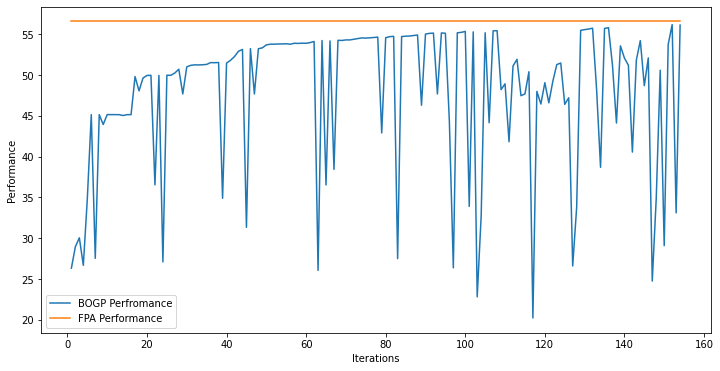

x_next is [ 29.99986161 -30.99998598  29.99949437 -11.28414908  29.99981918
  29.99979447  29.9998895   29.99997962  29.99997523  29.99955908
 -30.99983537  29.99984504  29.99985795 -30.99997905  29.99997118
  -5.75111759  29.99953508  29.99991342 -16.71135247  29.99978953]
f()=52.758749, actual=48.723
1


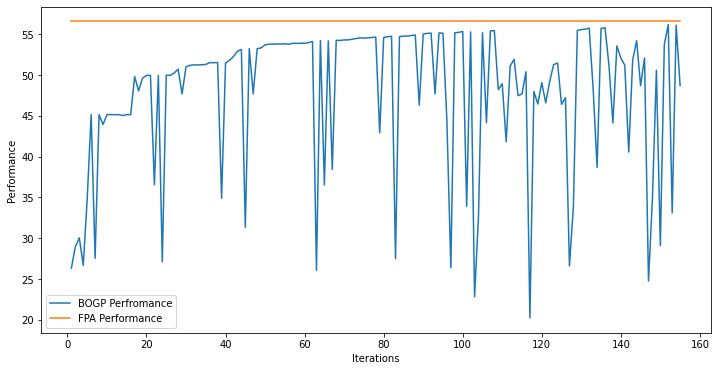

x_next is [ 29.98729087  29.98866643  29.99882295  23.85659086  29.99615969
  29.98605438  29.94720622  29.99591749 -30.99092377  21.53397443
  29.98325497  29.98651517 -30.98752948  -4.47296972  29.98842808
  29.99314172  29.95260942  29.99376081   9.22004371  29.96469278]
f()=56.909487, actual=57.153
2


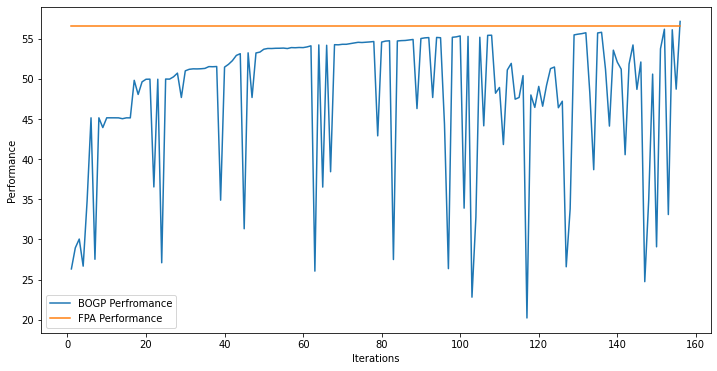

x_next is [ 29.99259074  29.99768859  29.96352542  24.3919307   29.99851171
  29.92655649  29.99598491  29.99399738 -30.98047234  20.30611384
  29.98284787  29.95578398 -30.97123323  -5.274664    29.98993772
  29.98716826  29.92400346  29.99688823  12.74568179  29.92797547]
f()=57.852185, actual=57.962
3


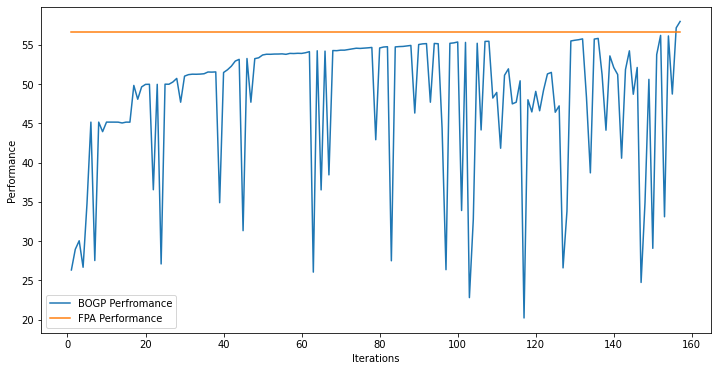

x_next is [ 29.99970466 -30.99980788  29.99905368  29.99991995  29.99951016
  29.99966295  29.99970776  29.99973216  29.99962392  29.99995614
 -30.99977602  29.99975042  29.99988533 -30.99982534  29.99988196
  29.99974513  29.99979064 -23.56284803 -19.22755952  29.9999255 ]
f()=50.991798, actual=50.539
4


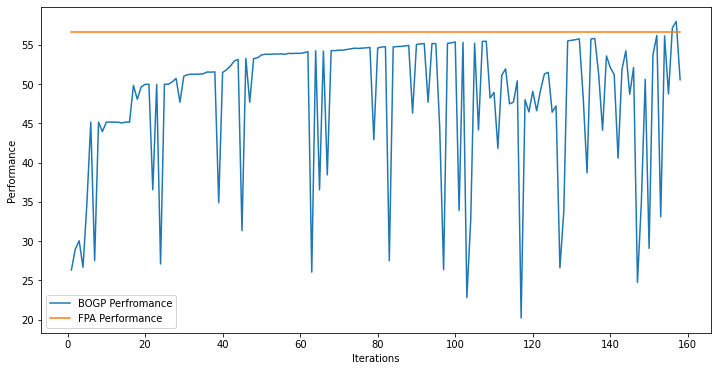

x_next is [ 29.99974014 -30.99927035  29.9995893   29.99881817  29.99956234
  29.99935263  29.99967636  29.99968329  29.99995243  29.99939942
 -30.99970948 -29.67742875  29.99955495 -30.99979274  29.99945155
  29.999553    29.99930618  29.9989252  -28.0211087   29.99999176]
f()=49.372252, actual=52.911
5


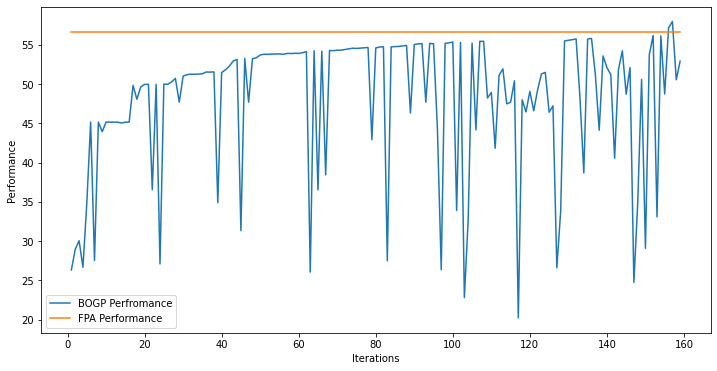

x_next is [ 29.99971919 -30.99987329  29.99926704  -8.42284501  29.99939711
  29.99969518  29.99891452  29.99964823  29.99994779  29.9998604
 -30.99958519 -27.35978666  29.9982082   29.9946464   29.99993333
  29.99914877  29.99961575  29.99974692 -30.46040991  29.99923458]
f()=49.173455, actual=50.859
6


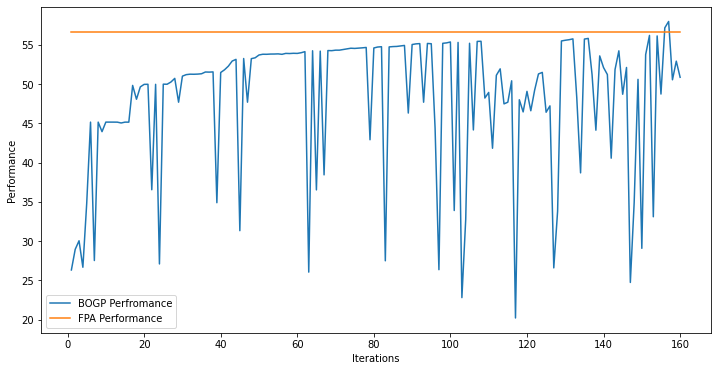

x_next is [ 29.9950846   29.99850292  29.97038406  24.59013763  29.99081509
  29.93932732  29.98853947  29.98179494 -30.97645965  19.83868453
  29.98819983  29.94627961 -30.97156606  -5.63404051  29.99700247
  29.99794892  29.94875333  29.9948221   14.09912318  29.9216525 ]
f()=58.217730, actual=58.224
7


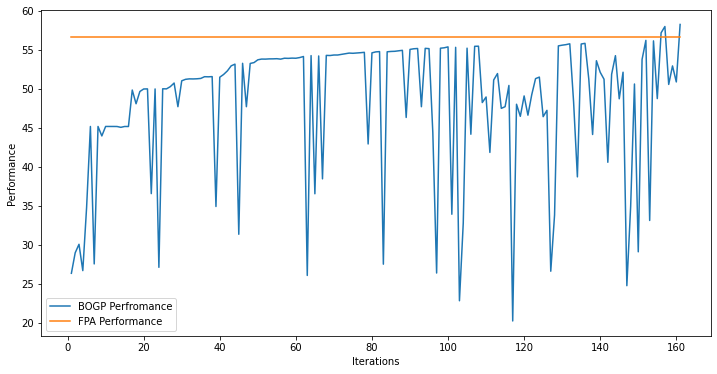

x_next is [ 29.99574184  29.95081528  29.96655053  25.42423186  29.98369725
  29.96894523  29.99723952  29.9567958  -30.99361892  18.86209346
  29.99283701  29.97516559 -30.94698617  -6.81301079  29.99620074
  29.98717693  29.98871874  29.97244057  17.89507249  29.96769724]
f()=58.815875, actual=58.664
8


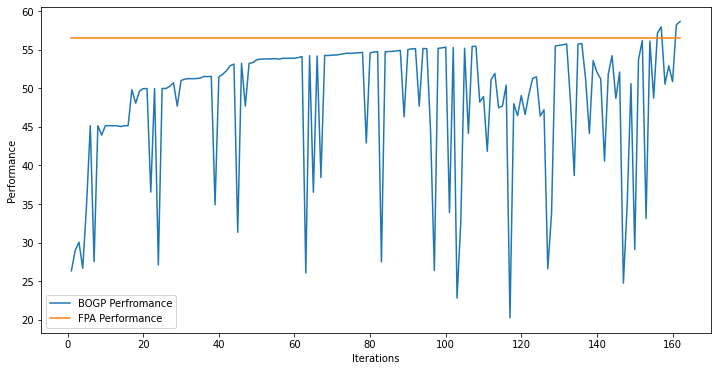

x_next is [ 29.9839284   29.99912599  29.99369582  26.27520259  29.99683832
  29.93108691  29.99252462  29.99339917 -30.99339673  18.78945113
  29.96198649  29.93740822 -30.97113503  -7.83214291  29.99599065
  29.97290764  29.9753235   29.98860981  20.10162801  29.96731992]
f()=58.827358, actual=58.635
9


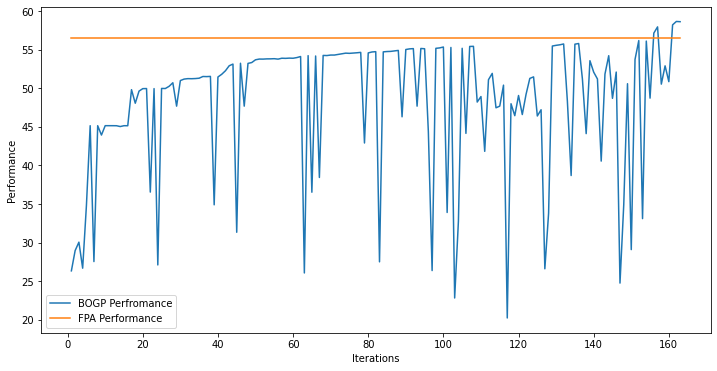

x_next is [ 29.99941743 -30.99887621  29.9993229   29.99876999  29.99944739
  29.99957064  29.99978116  29.99977447  29.99940862  29.99959192
  29.99908995  29.99978646  29.99985793 -30.99847554  29.99986094
  29.99947185  29.99917843  29.99950086  -7.27039846  29.99989005]
f()=51.251544, actual=53.101
10


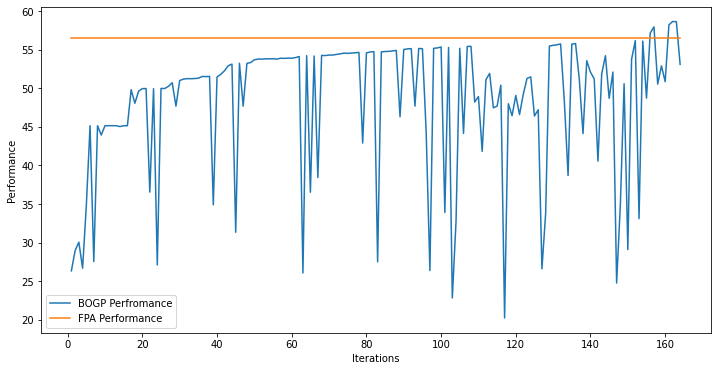

x_next is [ 29.99939164  29.98627281  29.99471555  25.6937539   29.98558841
  29.97260969  29.99150801  29.99426143 -30.99084275  18.40341335
  29.95821307  29.98503425 -30.94811272  -6.97157369  29.93173497
  29.99959792  29.98763125  29.97838469  18.90143004  29.9199024 ]
f()=58.683960, actual=58.661
11


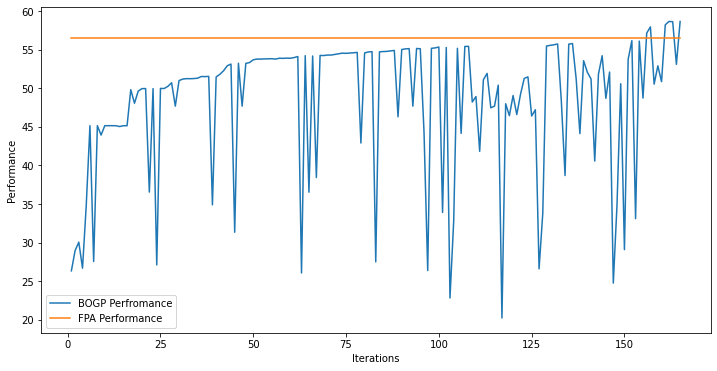

x_next is [ 29.98896734  29.99955396  29.99776449  29.99808925  29.98775673
  29.99870364 -30.98710434  29.99931476 -30.99680894  29.99676022
  29.99746535 -30.99601266 -30.99790575  29.99189241 -30.98012387
  29.99816463  29.99547149  29.99854933  29.99620519 -30.99277241]
f()=48.340442, actual=47.683
12


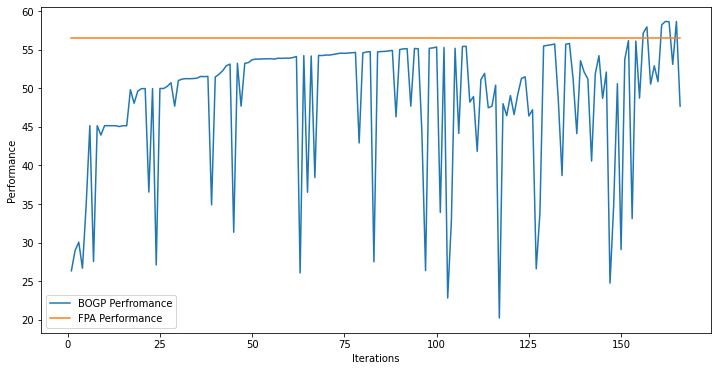

x_next is [ 11.22191501   8.90135328 -27.8101711  -10.28325514 -18.06479571
   3.55093444 -17.54696854  29.26045946 -20.18385981  25.12513869
 -24.49751026  22.47484575  20.95903499  25.06529591 -26.53807344
   8.55408876   7.65500932 -12.77543142  -1.19485258  25.16757632]
f()=48.336536, actual=32.993
13


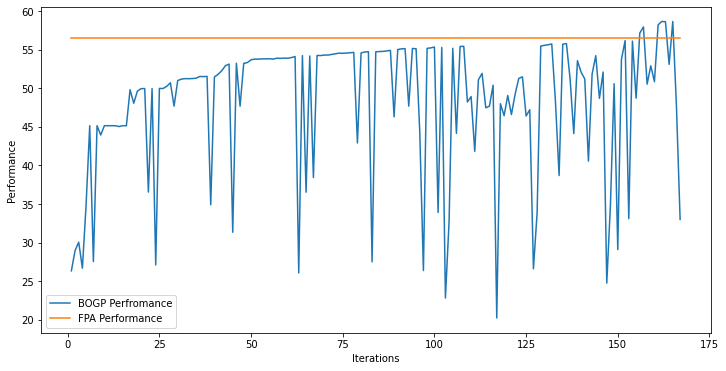

x_next is [  3.15460841 -18.94442135  17.84580795   6.68344454   5.93501455
   4.34411727   5.57199492  16.41498756 -12.29360519 -12.67758734
   1.47054803 -12.00689238  -0.57667428  16.42111684 -24.55609615
   5.33386302   7.58821471   0.82612373  18.58303998   9.19875449]
f()=48.244520, actual=35.741
14


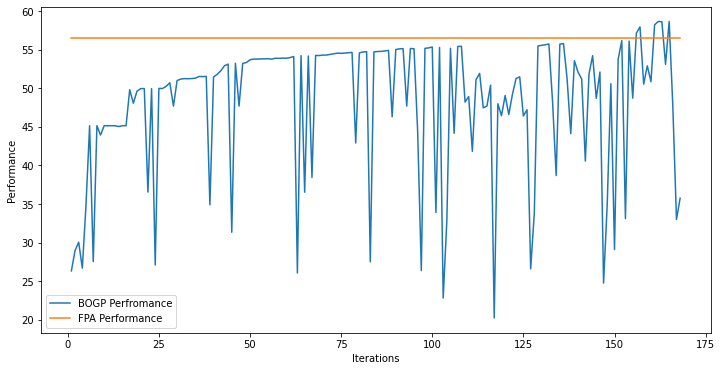

x_next is [ 29.9996714   29.9952203   29.98905835  25.24419594  29.99504526
  29.98646888  29.99565189  29.99753289 -30.99740529  19.13346408
  29.99584455  29.99290834 -30.84587301  -7.38233825  29.99442465
  29.99180871  29.99333772  29.99372993  18.61807403  29.99978278]
f()=58.688642, actual=58.788
15


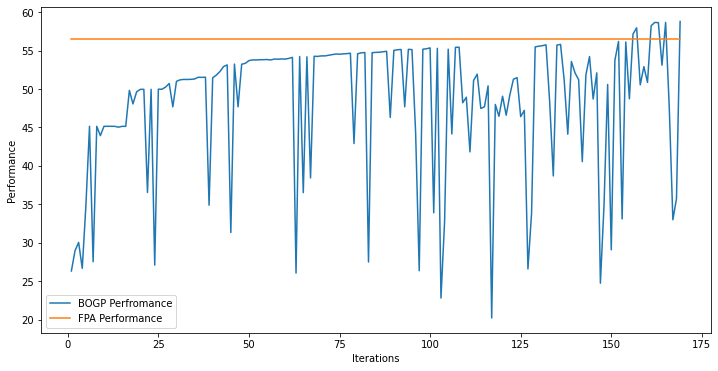

x_next is [ 29.95658785  29.98788717  29.97560304  24.4893686   29.97179911
  29.94202232  29.94718369  29.99649892 -30.98446209  20.44988265
  29.97689553  29.921367   -30.58669454  -8.65423069  29.95797966
  29.98828636  29.96969412  29.99825144  19.35028963  29.99489709]
f()=59.000666, actual=58.964
16


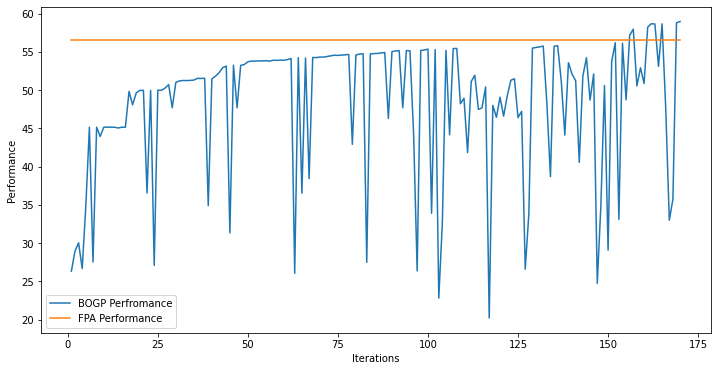

x_next is [ 29.98869117  29.95609255  29.99690494  23.45426227  29.9926759
  29.98256809  29.99999206  29.98764071 -30.97407604  21.09663955
  29.96708205  29.97437658 -30.26919219  -9.1426461   29.87381419
  29.99573974  29.99708027  29.98282789  19.62517734  29.96382385]
f()=59.114266, actual=59.029
17


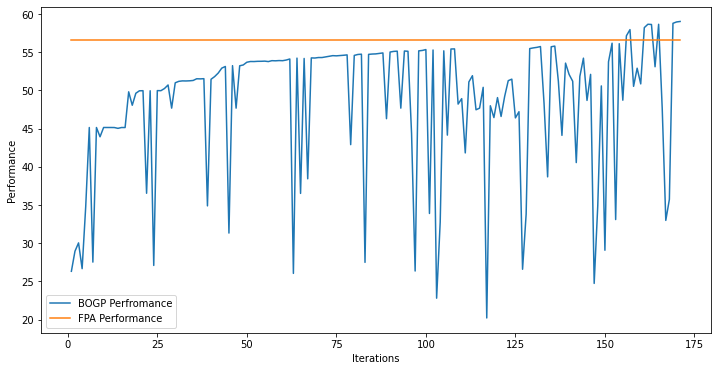

x_next is [ 29.99761308  29.9970382   29.99421449  21.54663658  29.99932744
  29.99898479  29.99319642  29.99719573 -30.99591135  21.01299447
  29.991496    29.99927045 -29.94814315  -9.18778322  29.9876503
  29.99997572  29.98260966  29.99920926  19.85932714  29.99774729]
f()=59.114778, actual=59.097
18


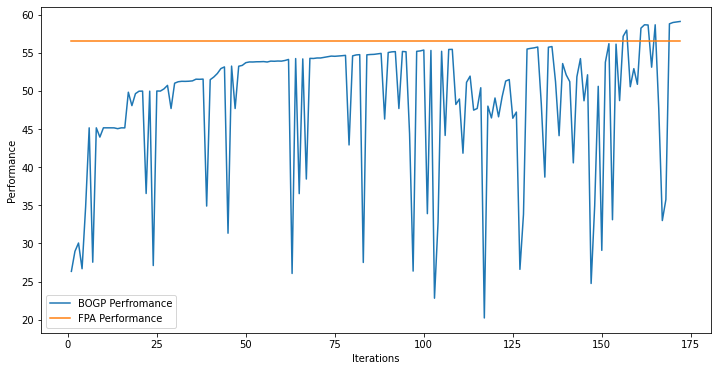

x_next is [-14.54978207 -12.55440585 -12.81034408 -26.26619561  19.52877039
   0.74217533  27.49559305 -15.58162741 -28.66952203  -7.244643
 -20.77907671  15.84858582   2.67120313   3.80459108   2.97736727
  15.16838063 -29.89641468  13.06376849   3.70831374  -0.29842618]
f()=48.421127, actual=30.605
19


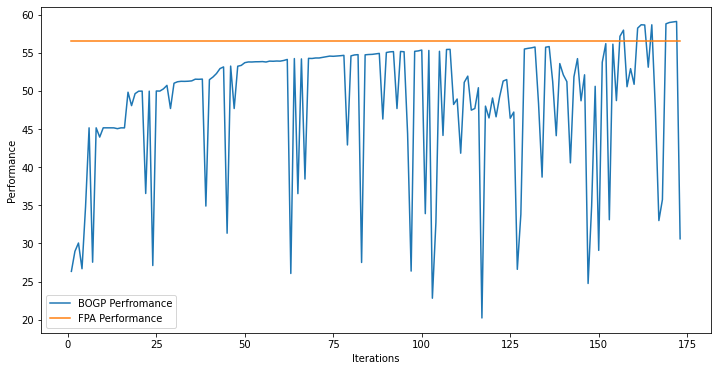

x_next is [ 29.99604269  29.99578257  29.9754124   20.45725205  29.99206822
  29.9454482   29.94455631  29.94833828 -30.98451874  20.80214219
  29.99607692  29.98730513 -29.86004036  -9.30584353  29.97790788
  29.96900746  29.92080066  29.99806031  20.0731677   29.98444247]
f()=59.099133, actual=59.061
20


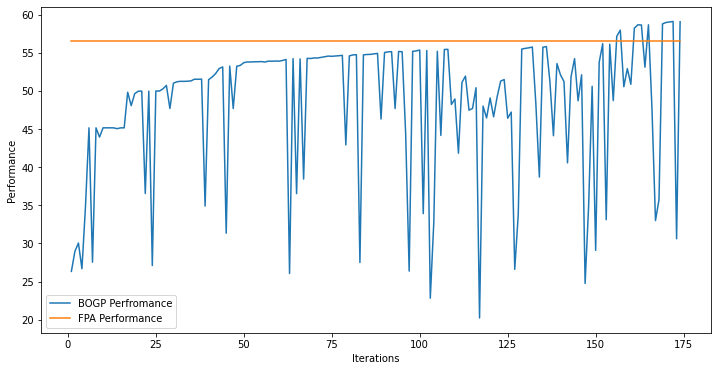

x_next is [ 29.99855018  29.99914563  29.99987547  21.57081574  29.99877818
  29.99940347  29.99198956  29.99987181 -30.99941313  21.28744606
  29.99658133  29.99333479 -29.45038961  -8.54448911  29.99977453
  29.99889541  29.99800118  29.9979653   20.01098148  29.9992771 ]
f()=59.116661, actual=59.088
21


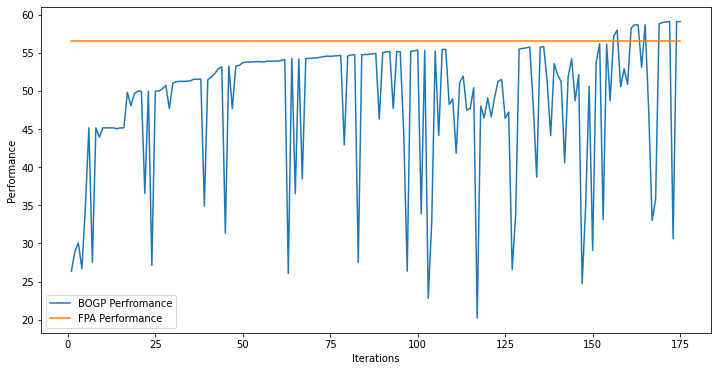

x_next is [ 29.99624019  29.99387231  29.99975078  21.49558823  29.99056094
  29.99903726  29.99783184  29.99594667 -30.99512307  21.2222619
  29.99949108  29.99556157 -30.35251827  -8.93202133  29.99969319
  29.99962853  29.99290026  29.99712019  19.90403358  29.99548083]
f()=59.097281, actual=59.085
22


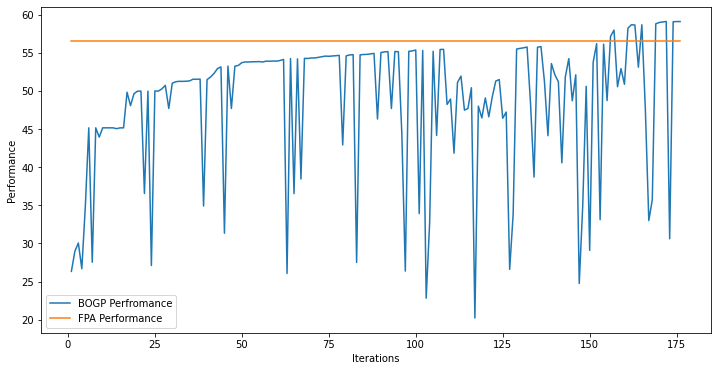

x_next is [ 29.9998661  -25.89276882  24.20385666  13.10845911  27.79824818
  29.21609871  29.99999916  29.99998698  25.07336324  28.91840783
 -17.68420448   9.94966167  18.29282386 -20.37263731  29.99974743
  27.76690432  28.50398543  21.04551565 -10.00255784  29.99999859]
f()=60.515898, actual=48.809
23


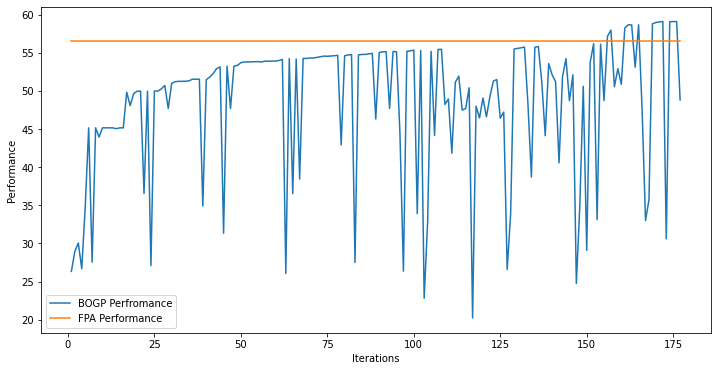

x_next is [ 29.99218855  29.99694496  29.99920813  21.63448672  29.99921619
  29.99063604  29.97838609  29.99177236 -30.99375473  20.6985037
  29.99727762  29.99921398 -29.29639241  -9.21915114  29.9960087
  29.96222618  29.99036881  29.99938186  19.43595307  29.98843441]
f()=59.097789, actual=59.115
24


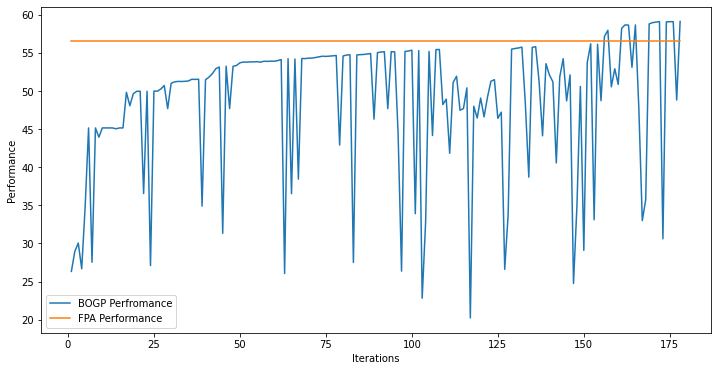

x_next is [ 29.9996557  -30.99995454  29.99955176 -30.99965314  29.999398
  29.99994003  29.99978254  29.99919098  29.99845081  29.9992391
 -30.99996733 -30.99895894  29.99945149  29.99848381 -30.99996336
  29.99943563  29.99973063  29.99881726  29.9999226   29.99993554]
f()=47.518659, actual=52.386
25


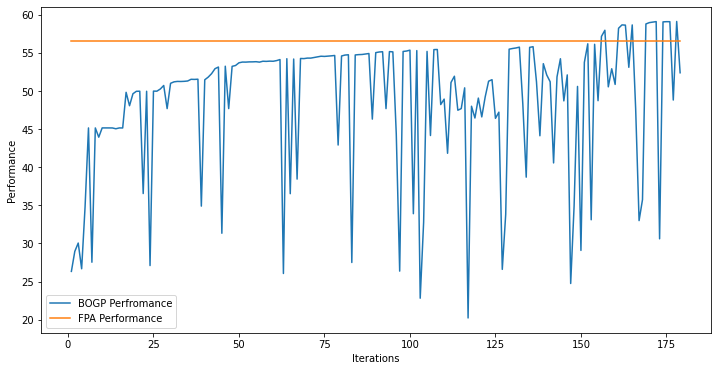

x_next is [ 29.95977894  29.97452314  29.95939547  21.69044084  29.9725816
  29.97859416  29.86978015  29.96493564 -30.86793131  20.57509834
  29.92848451  29.97454912 -29.28627014  -9.15598179  29.99969823
  29.93373084  29.98793262  29.981628    19.28682404  29.97908061]
f()=59.163194, actual=59.115
26


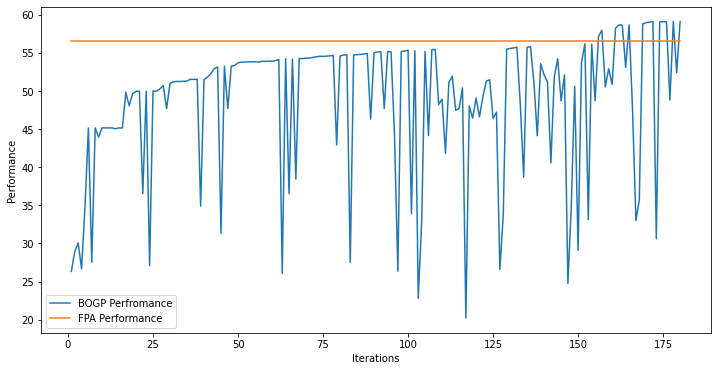

x_next is [ 29.99928962 -30.99987361  29.99952129 -27.66291401  29.99989706
  29.99964924  29.99980481  29.99942096  29.99956659  29.99890884
 -30.99979035 -30.99926567  29.99996129 -30.99967013 -30.99970601
  29.99926841  29.99959217  29.99981535 -30.99812686  29.99998925]
f()=50.101393, actual=47.997
27


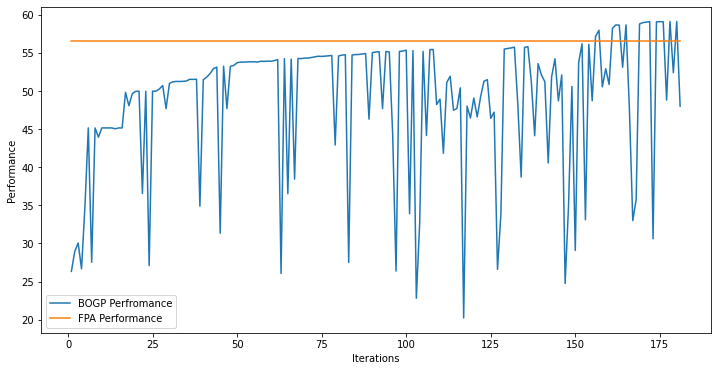

x_next is [ 29.99974628  29.99973656  29.99976754  29.99963936  29.99993027
  29.99985075 -30.99997496  29.99966616 -30.99987893  29.99994696
  29.99982345 -30.99987544 -30.99957492  29.9998438   29.9890562
  29.99998652  29.99987329  29.9998473   29.99987804 -30.99851831]
f()=48.639125, actual=48.544
28


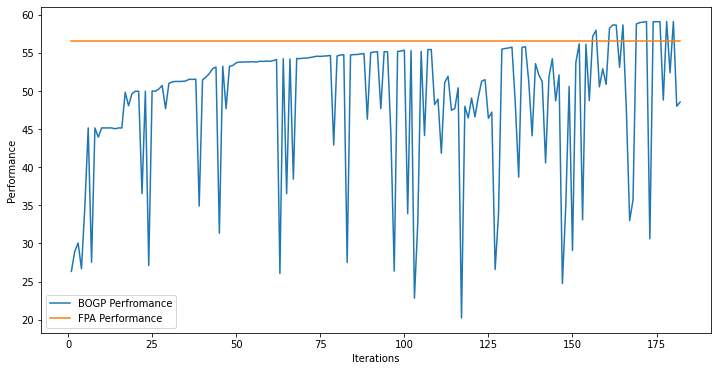

x_next is [ 29.99394355  29.99902891  29.98987958  21.75028216  29.99666501
  29.99969533  29.27377705  29.99871183 -30.61075233  20.31096553
  29.98192531  29.99972596 -29.22263732  -9.32515348  29.99622939
  29.99828058  29.99834762  29.99970152  18.905904    29.99761342]
f()=59.140718, actual=59.041
29


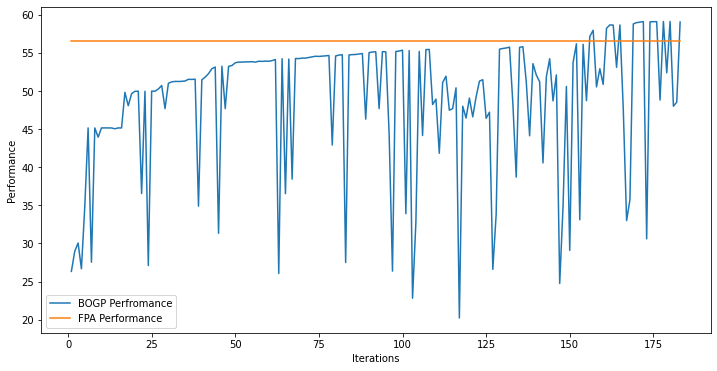

x_next is [ 18.15211496 -10.71906359 -29.63443033  19.290677    12.1923019
 -17.00956027  14.1887939   17.1500507   25.26978301  11.29881572
 -17.36842156 -13.99793393  -6.39110185 -22.78337248 -25.18712046
  -2.5597122   24.39632871   2.10330328  -1.54407121  12.16765973]
f()=48.695485, actual=34.011
30


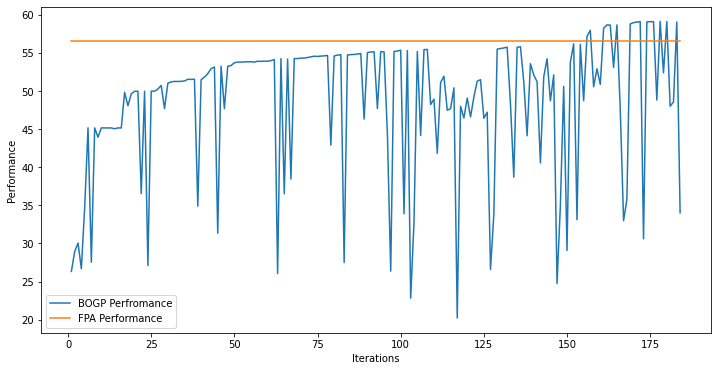

x_next is [ 29.53942185  29.96377283  29.59766175  21.74628221  29.76712435
  29.9487484   29.99283296  29.95499025 -30.60564352  20.15622982
  29.19800254  29.72468229 -29.44714702  -8.77974214  29.99737007
  29.64770228  29.99429157  29.94645834  19.21898676  29.95940909]
f()=59.194849, actual=59.211
31


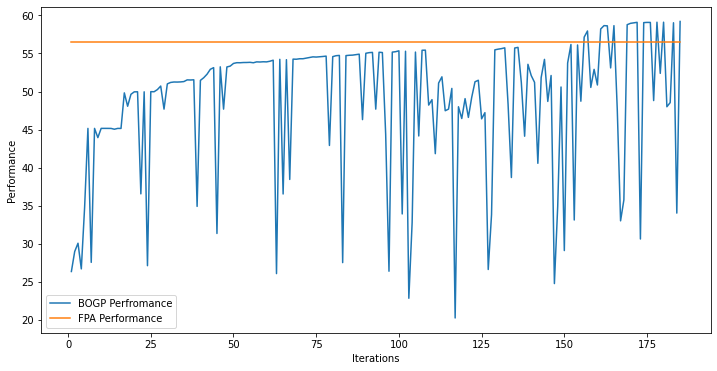

x_next is [ 29.99969531 -30.99871538  29.99964171  29.99999199  29.99996688
  29.9995216   29.99986232  29.99959709  29.99995579  29.99954972
 -30.99979927  29.99916618  29.99939126 -30.99974265  29.99981926
  29.99971257 -30.99831798  29.99942283  29.99665685  29.99956619]
f()=49.113579, actual=52.942
32


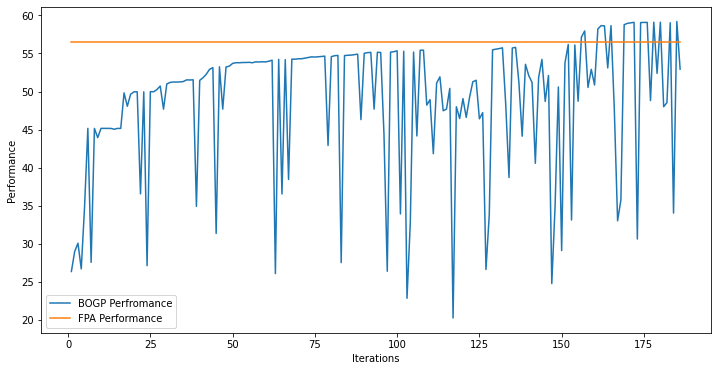

x_next is [ 29.02419651  25.87703063  28.97800487  29.64809098  29.04136465
  29.99797746 -11.92659354  28.08549459 -18.93421983  27.77729357
  29.53879113  -1.02327813 -29.65880938  21.61268714  21.43059458
  26.43777065  28.2622232   22.1896084   17.43849212  21.72138721]
f()=48.688391, actual=50.180
33


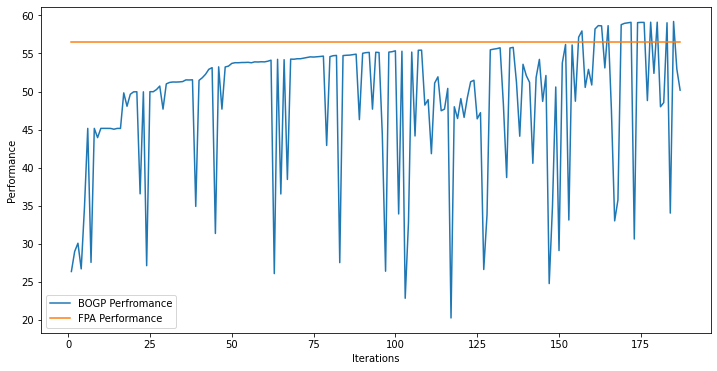

x_next is [ 29.03013417  29.99903593  29.08914076  21.53027332  29.53086129
  29.9686507   29.97869207  29.96715716 -30.33975881  20.00814017
  28.35166606  29.32903158 -29.43753825  -8.84229323  29.96791199
  29.3585376   29.98952511  29.9384169   19.40662803  29.98760925]
f()=59.269986, actual=59.254
34


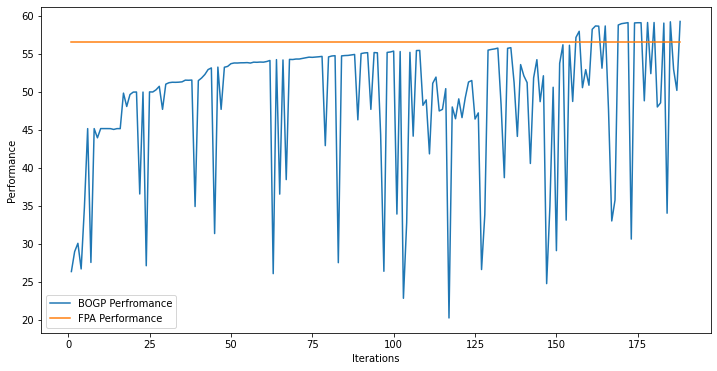

KeyboardInterrupt: ignored

In [16]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernels =  ConstantKernel(constant_value=200, constant_value_bounds = (1e-20, 1e20)) * Matern(length_scale=1, length_scale_bounds=(1e-20,1e20), nu=1.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-20, 1e20)) 
model = GaussianProcessRegressor(kernel = kernels, n_restarts_optimizer=30)

model.fit(X, y)

for i in range(250):
  x_next = opt_acquisition(X, y, model)

  np.save("/content/drive/MyDrive/trainingx_BOGP_PI.npy",X)
  np.save("/content/drive/MyDrive/trainingy_BOGP_PI.npy",y)
  np.save("/content/drive/MyDrive/grad_trainingyFPA_BOGP_PI.npy",y_FPA)
  
  tr = 0
  for l in range(1):
    tr = tr + objective_FPA(x_next.reshape((int)(var/number_of_cells), number_of_cells))
  tr = tr/1.0  
  actual = tr

  tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
  
  est, _ = surrogate(model, [x_next])
  print("x_next is", x_next)
  print('f()=%3f, actual=%.3f' % (est, actual))
  
  X = vstack((X, [x_next]))
  y = vstack((y, [[actual]]))
  y_FPA = vstack((y_FPA, [[tr_FPA]]))
  
  model.fit(X, y)

  print(i)
  pyplot.figure(figsize = (12, 6))

  pyplot.xlabel("Iterations")
  pyplot.ylabel("Performance")
  pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
  pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
  pyplot.legend(["BOGP Perfromance","FPA Performance"])
  pyplot.show()

pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

print("Power_configuration_BOGP is", X[ix])
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:])
pyplot.plot(np.arange(1,21),X_FPA[:])
pyplot.show()




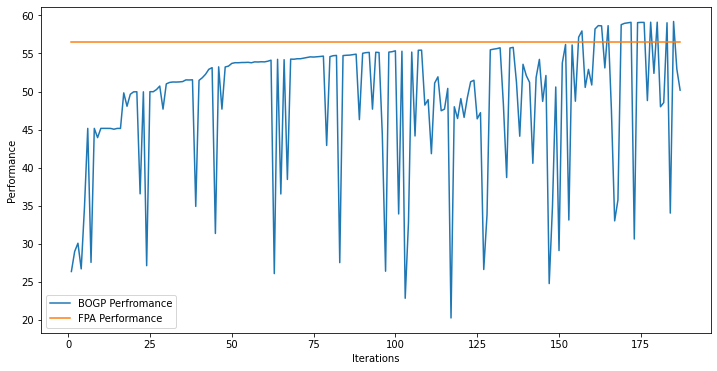

P_max = 30.000, Optimal_SE = 59.211
P_max = 30.000, Optimal_SE_FPA = 56.571


In [9]:
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

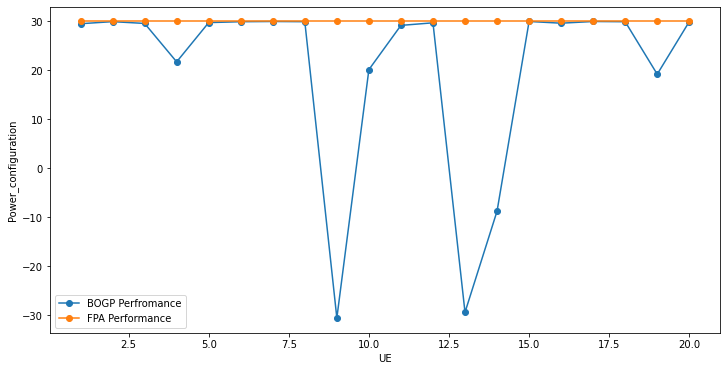

Power_configuration_BOGP is [ 29.53942185  29.96377283  29.59766175  21.74628221  29.76712435
  29.9487484   29.99283296  29.95499025 -30.60564352  20.15622982
  29.19800254  29.72468229 -29.44714702  -8.77974214  29.99737007
  29.64770228  29.99429157  29.94645834  19.21898676  29.95940909]


In [10]:
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:], '-o')
pyplot.plot(np.arange(1,21),X_FPA[:], '-o')
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show()
print("Power_configuration_BOGP is", X[ix])

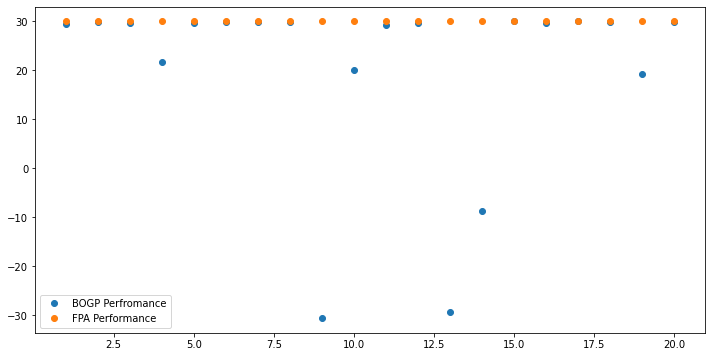

Power_configuration_BOGP is [ 29.53942185  29.96377283  29.59766175  21.74628221  29.76712435
  29.9487484   29.99283296  29.95499025 -30.60564352  20.15622982
  29.19800254  29.72468229 -29.44714702  -8.77974214  29.99737007
  29.64770228  29.99429157  29.94645834  19.21898676  29.95940909]


In [11]:
import matplotlib.pyplot as plt
X_FPA=np.linspace(P_max,P_max,20)
plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(1,21),X[ix][:], 'o')
plt.plot(np.arange(1,21),X_FPA[:], 'o')
plt.legend(["BOGP Perfromance","FPA Performance"])
plt.show()
print("Power_configuration_BOGP is", X[ix])